In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#LIMPIEZA
from sklearn.preprocessing import OrdinalEncoder





## DATAFRAME

In [72]:
df = pd.read_csv("../data/raw/Predict Hair Fall.csv")
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [74]:
df.describe()

,Id,Age,Hair Loss
count,999.000000,999.000000,999.000000
mean,153354.673674,34.188188,0.497497
std,25516.041985,9.377980,0.500244
min,110003.000000,18.000000,0.000000
25%,131867.500000,26.000000,0.000000
50%,152951.000000,34.000000,0.000000
75%,174969.000000,42.000000,1.000000
max,199949.000000,50.000000,1.000000


## VISUALIZACIONES I

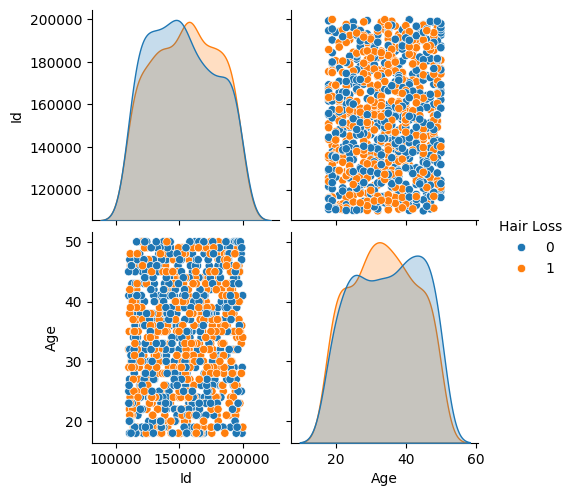

In [75]:
sns.pairplot(df, hue = "Hair Loss")

<Axes: >

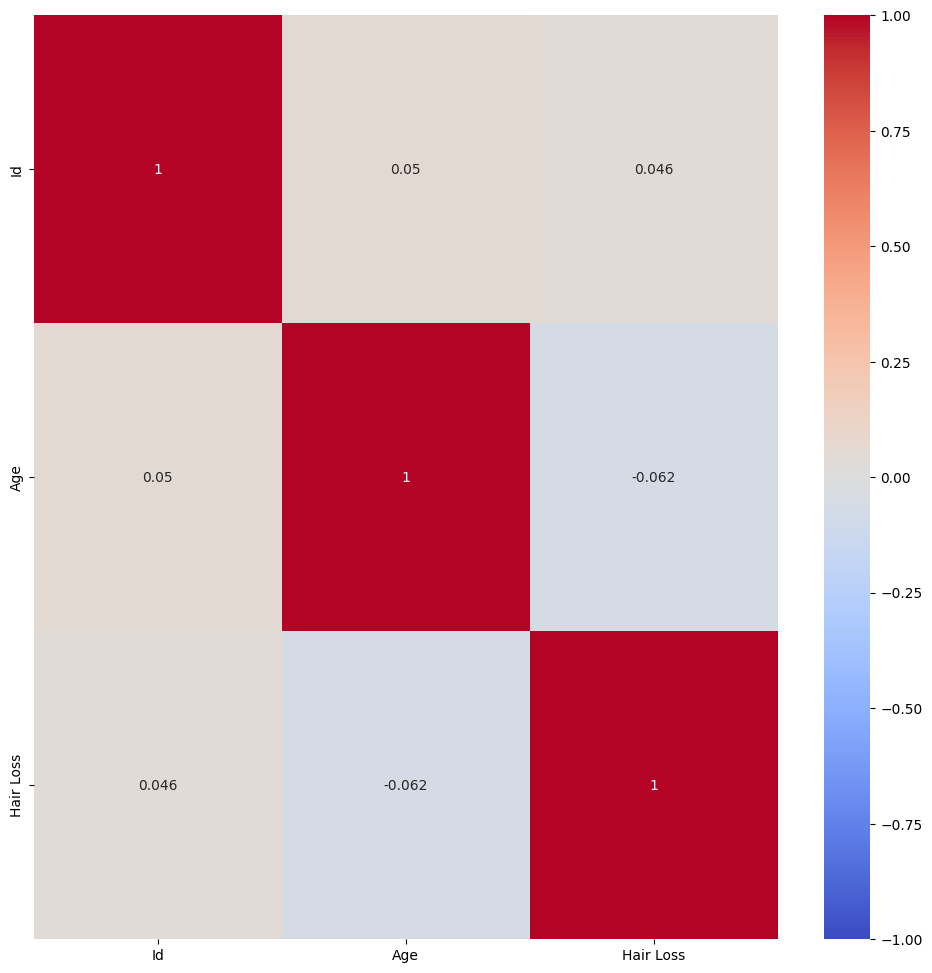

In [76]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

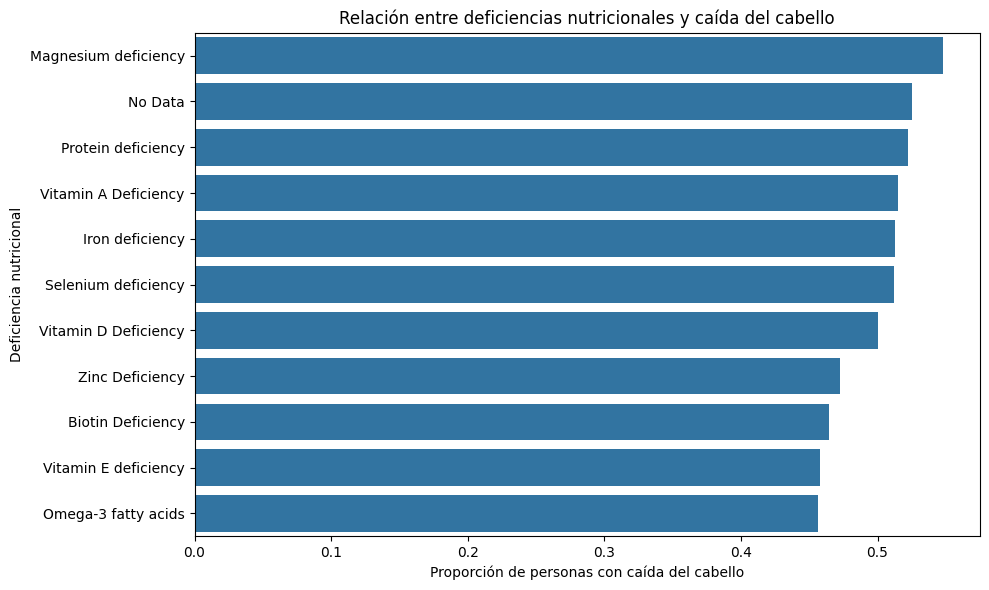

In [77]:
df_plot = df.groupby(df["Nutritional Deficiencies "].str.strip())["Hair Loss"].mean().reset_index()
df_plot = df_plot.sort_values(by="Hair Loss", ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x="Hair Loss", y="Nutritional Deficiencies ", data=df_plot)
plt.title("Relación entre deficiencias nutricionales y caída del cabello")
plt.xlabel("Proporción de personas con caída del cabello")
plt.ylabel("Deficiencia nutricional")
plt.tight_layout()
plt.show()

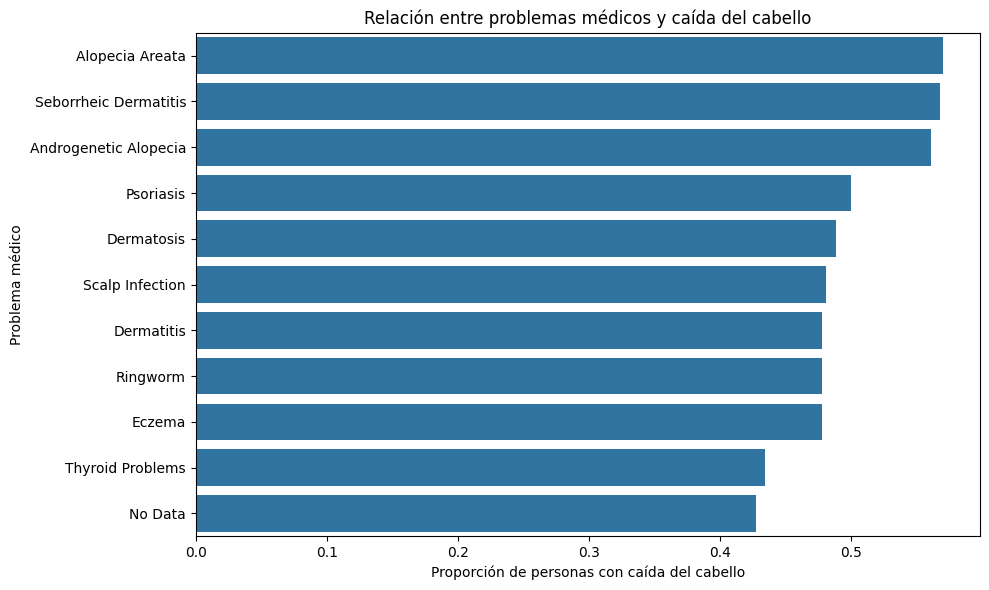

In [78]:
df_plot = df.groupby(df["Medical Conditions"].str.strip())["Hair Loss"].mean().reset_index()
df_plot = df_plot.sort_values(by="Hair Loss", ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x="Hair Loss", y="Medical Conditions", data=df_plot)
plt.title("Relación entre problemas médicos y caída del cabello")
plt.xlabel("Proporción de personas con caída del cabello")
plt.ylabel("Problema médico")
plt.tight_layout()
plt.show()

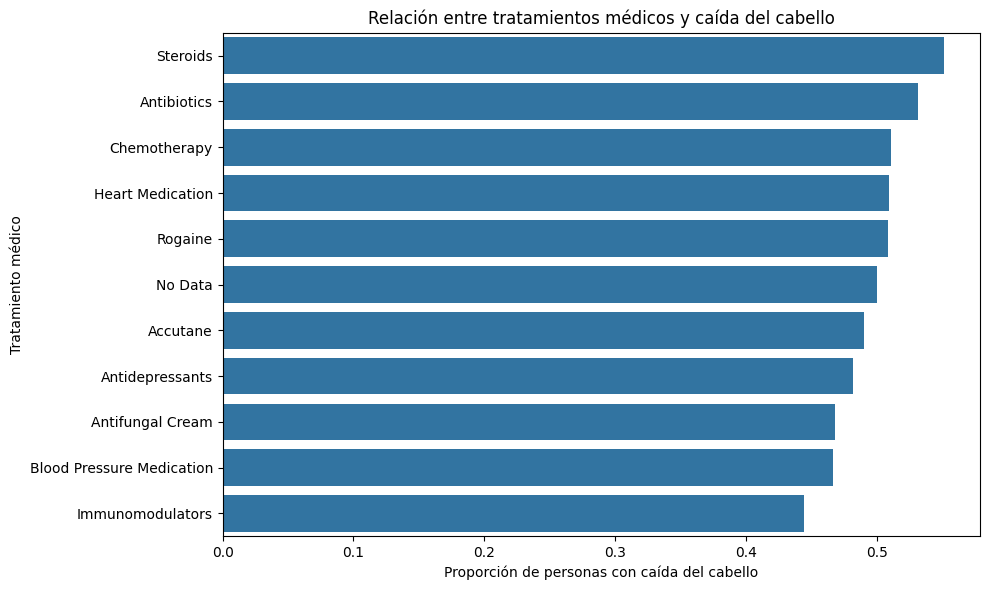

In [79]:
df_plot = df.groupby(df["Medications & Treatments"].str.strip())["Hair Loss"].mean().reset_index()
df_plot = df_plot.sort_values(by="Hair Loss", ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x="Hair Loss", y="Medications & Treatments", data=df_plot)
plt.title("Relación entre tratamientos médicos y caída del cabello")
plt.xlabel("Proporción de personas con caída del cabello")
plt.ylabel("Tratamiento médico")
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Hair Loss'}>, <Axes: >]], dtype=object)

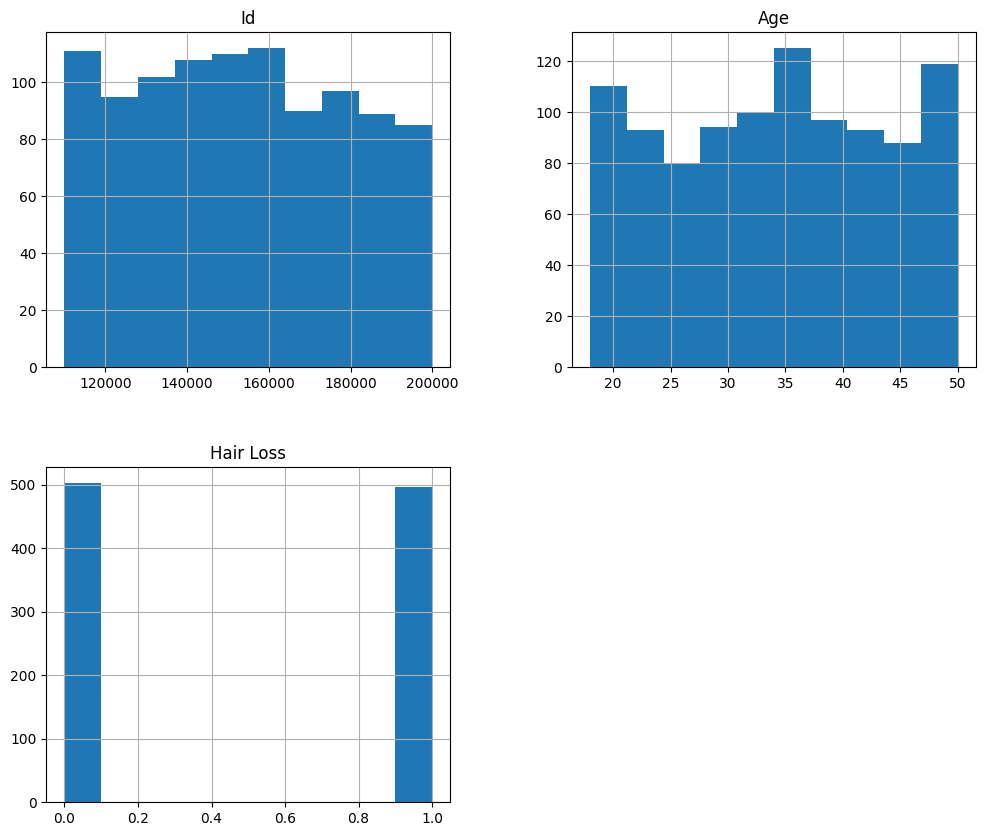

In [80]:
df.hist(figsize=(12, 10))

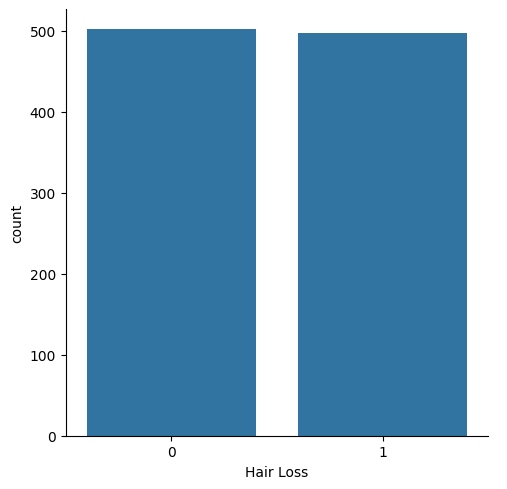

In [81]:
sns.catplot(x= "Hair Loss", data = df, kind="count")


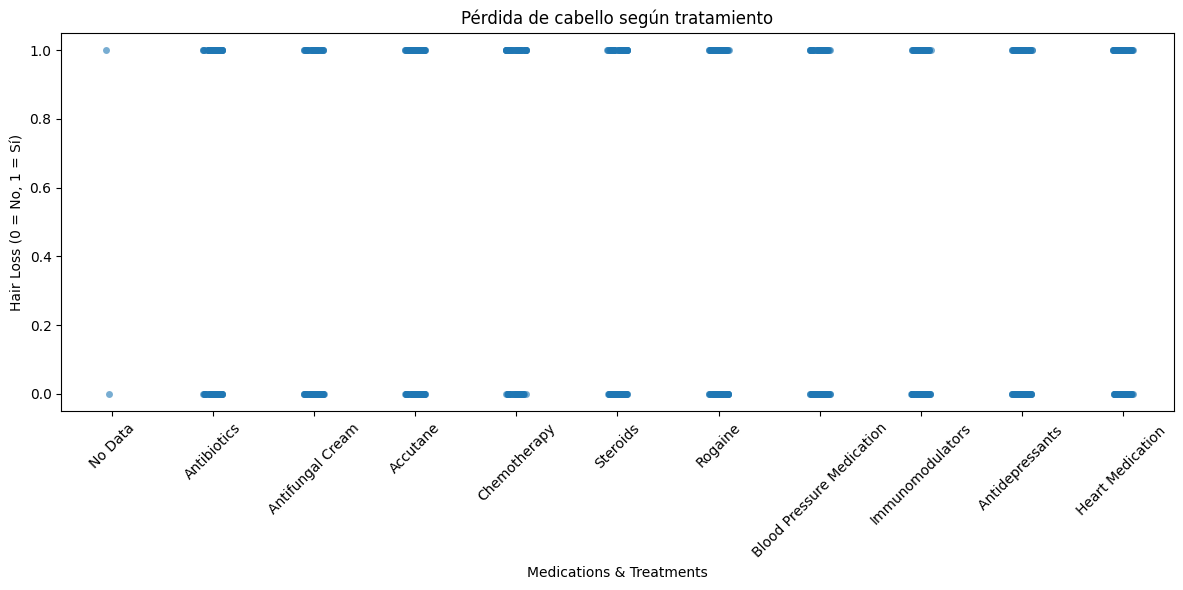

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="Medications & Treatments", y="Hair Loss", jitter=True, alpha=0.6)
plt.xticks(rotation=45)
plt.title("Pérdida de cabello según tratamiento")
plt.ylabel("Hair Loss (0 = No, 1 = Sí)")
plt.xlabel("Medications & Treatments")
plt.tight_layout()
plt.show()

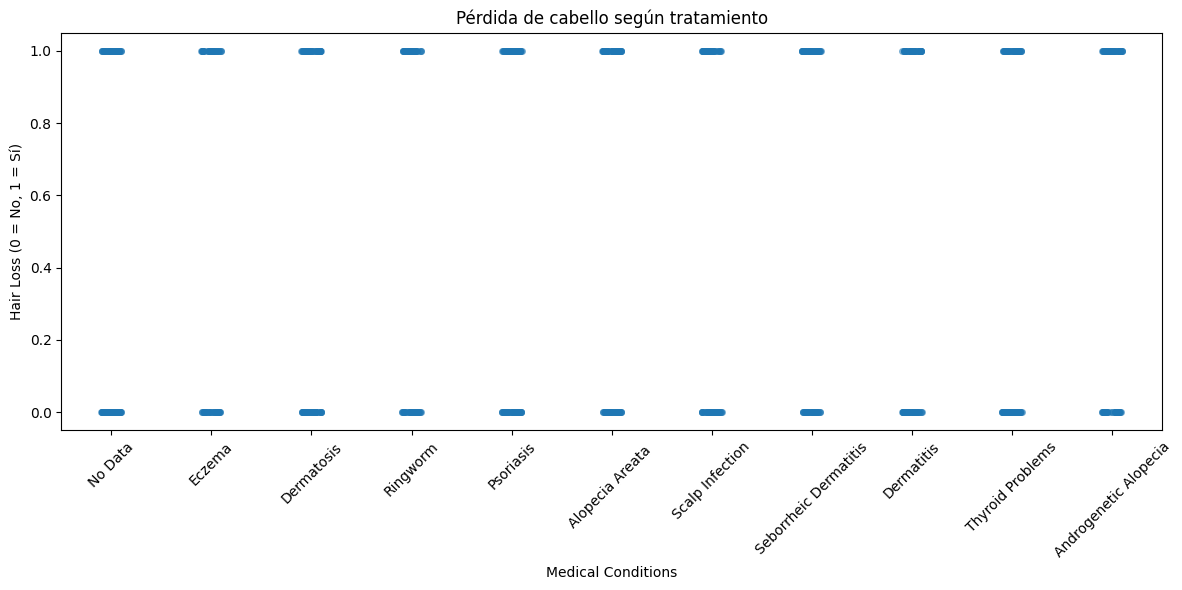

In [83]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="Medical Conditions", y="Hair Loss", jitter=True, alpha=0.6)
plt.xticks(rotation=45)
plt.title("Pérdida de cabello según tratamiento")
plt.ylabel("Hair Loss (0 = No, 1 = Sí)")
plt.xlabel("Medical Conditions")
plt.tight_layout()
plt.show()

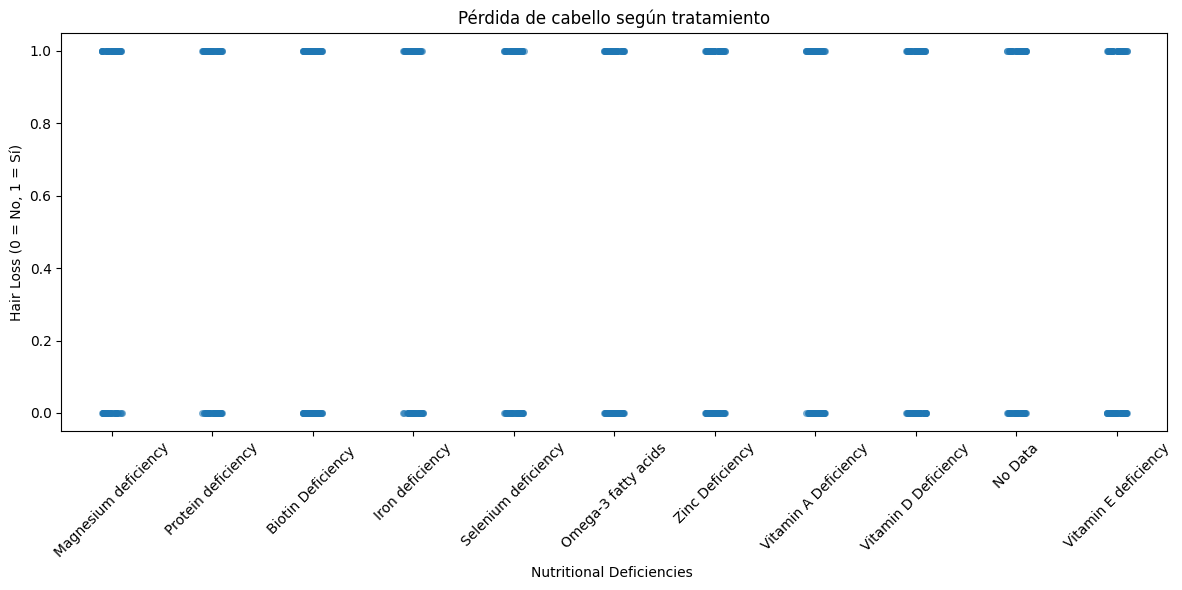

In [84]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="Nutritional Deficiencies ", y="Hair Loss", jitter=True, alpha=0.6)
plt.xticks(rotation=45)
plt.title("Pérdida de cabello según tratamiento")
plt.ylabel("Hair Loss (0 = No, 1 = Sí)")
plt.xlabel("Nutritional Deficiencies ")
plt.tight_layout()
plt.show()

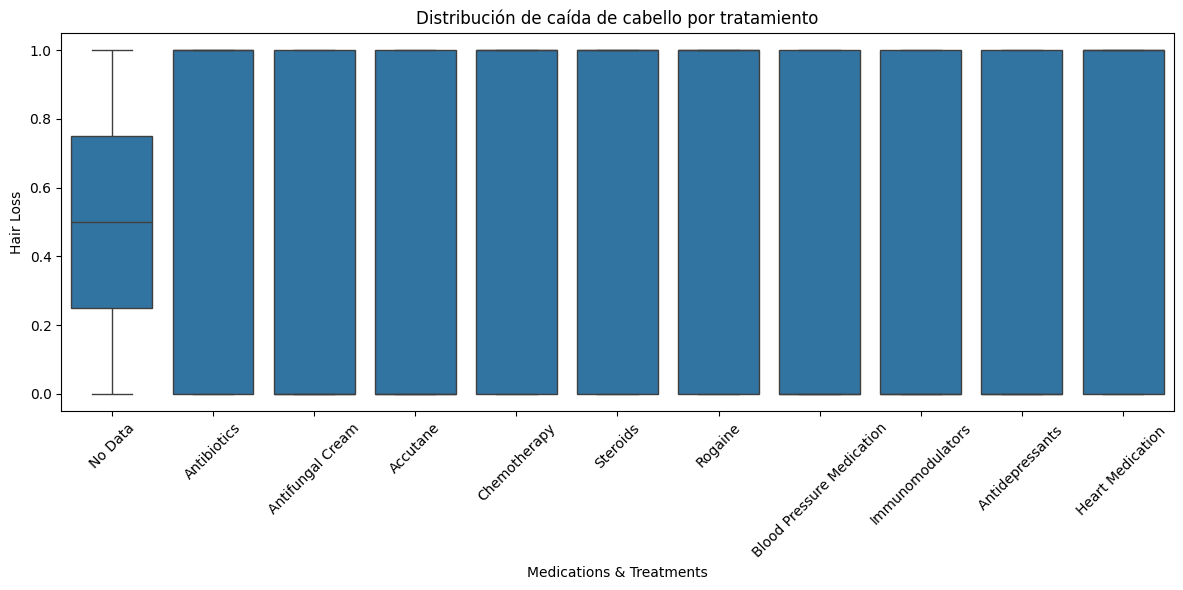

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Medications & Treatments", y="Hair Loss")
plt.xticks(rotation=45)
plt.title("Distribución de caída de cabello por tratamiento")
plt.ylabel("Hair Loss")
plt.xlabel("Medications & Treatments")
plt.tight_layout()
plt.show()


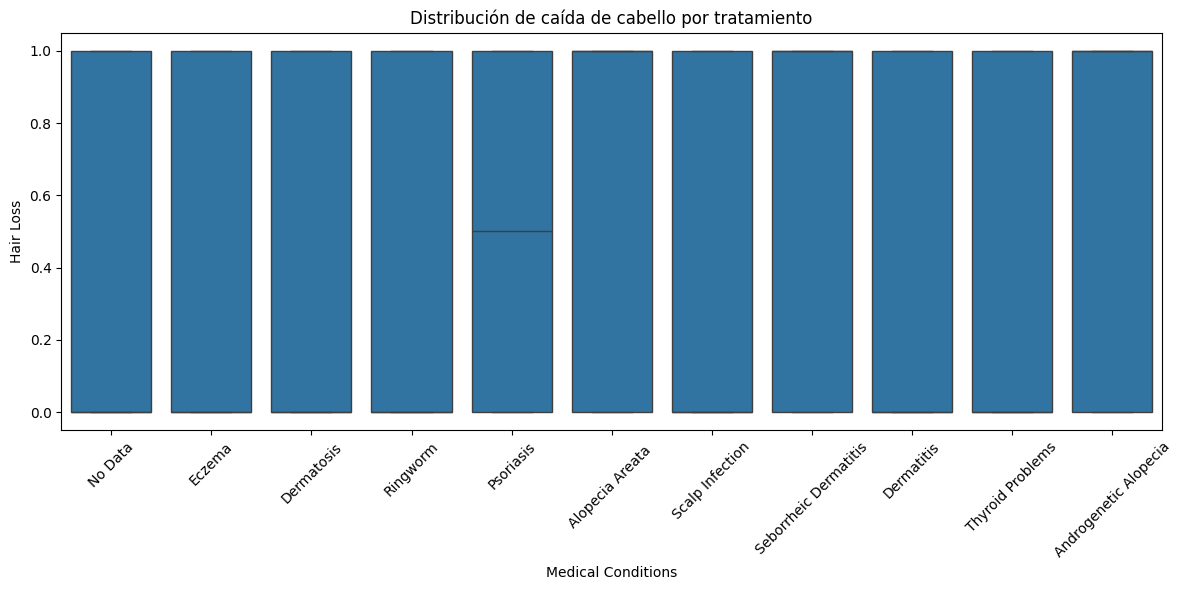

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Medical Conditions", y="Hair Loss")
plt.xticks(rotation=45)
plt.title("Distribución de caída de cabello por tratamiento")
plt.ylabel("Hair Loss")
plt.xlabel("Medical Conditions")
plt.tight_layout()
plt.show()

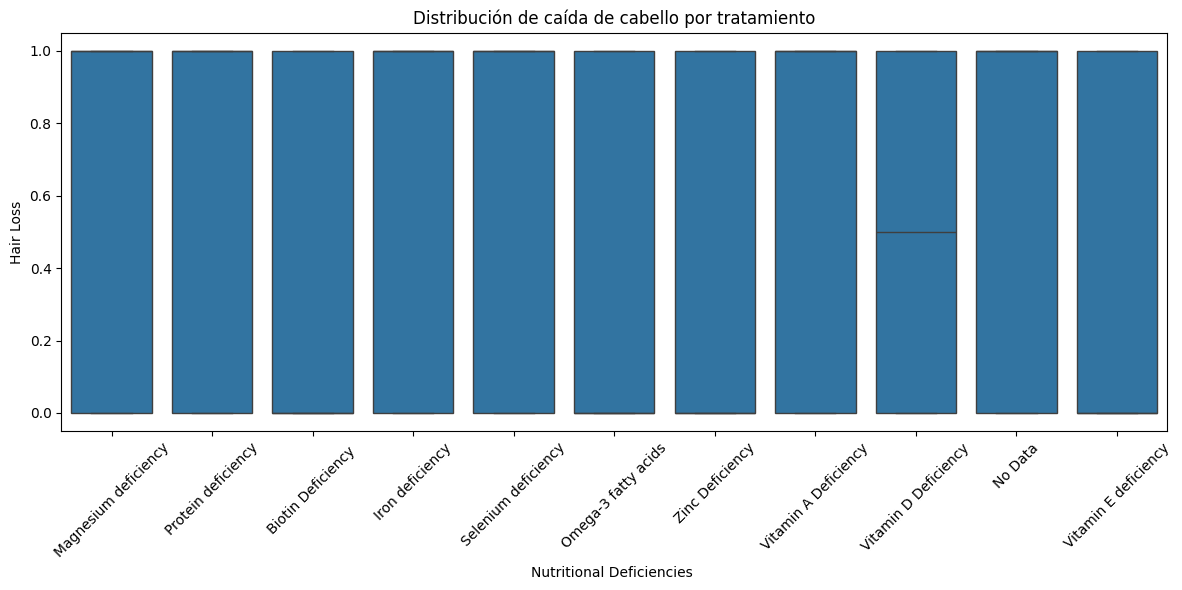

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Nutritional Deficiencies ", y="Hair Loss")
plt.xticks(rotation=45)
plt.title("Distribución de caída de cabello por tratamiento")
plt.ylabel("Hair Loss")
plt.xlabel("Nutritional Deficiencies ")
plt.tight_layout()
plt.show()

## LIMPIEZA

### Booleanos

In [88]:
df["Environmental Factors"].unique()

array(['Yes', 'No'], dtype=object)

In [89]:
print(df["Genetics"].value_counts().unique())
print(df["Hormonal Changes"].value_counts().unique())
print(df["Poor Hair Care Habits "].value_counts().unique())
print(df["Environmental Factors"].value_counts().unique())
print(df["Smoking"].value_counts().unique())
print(df["Weight Loss "].value_counts().unique())
print(df["Hair Loss"].value_counts().unique())

[522 477]
[509 490]
[507 492]
[508 491]
[519 480]
[527 472]
[502 497]


In [90]:
print(df['Hair Loss'].unique())
print(df['Hair Loss'].value_counts())


[0 1]
Hair Loss
0    502
1    497
Name: count, dtype: int64


In [91]:

orden = [['No','Yes']]

encoder = OrdinalEncoder(categories=orden)
df['Genetics_encoder'] = encoder.fit_transform(df[['Genetics']])

encoder = OrdinalEncoder(categories=orden)
df['Hormones_encoder'] = encoder.fit_transform(df[['Hormonal Changes']])

encoder = OrdinalEncoder(categories=orden)
df['HairCare_encoder'] = encoder.fit_transform(df[['Poor Hair Care Habits ']])

encoder = OrdinalEncoder(categories=orden)
df['Environment_encoder'] = encoder.fit_transform(df[['Environmental Factors']])

encoder = OrdinalEncoder(categories=orden)
df['Smoking_encoder'] = encoder.fit_transform(df[['Smoking']])

encoder = OrdinalEncoder(categories=orden)
df['Weight_encoder'] = encoder.fit_transform(df[['Weight Loss ']])


df.head(1)

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0,1.0,0.0,1.0,1.0,0.0,0.0


In [92]:
print(df["Stress"].unique())
print(df["Stress"].value_counts().unique())
print(df['Stress'].apply(repr).unique())


['Moderate' 'High' 'Low']
[351 327 321]
["'Moderate'" "'High'" "'Low'"]


In [93]:
stress_mapping = {
    'Low': 0,
    'Moderate': 1,
    'High': 2
}

df['Stress'] = df['Stress'].map(stress_mapping)

df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,1,19,Yes,Yes,No,No,0,1.0,0.0,1.0,1.0,0.0,0.0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,2,43,Yes,Yes,No,No,0,0.0,0.0,1.0,1.0,0.0,0.0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,1,26,Yes,Yes,No,Yes,0,0.0,0.0,1.0,1.0,0.0,1.0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,1,46,Yes,Yes,No,No,0,1.0,1.0,1.0,1.0,0.0,0.0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,1,30,No,Yes,Yes,No,1,0.0,0.0,0.0,1.0,1.0,0.0


### Strings

In [94]:
print(df["Nutritional Deficiencies "].unique())
print(df["Nutritional Deficiencies "].value_counts()["No Data"])

['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' 'No Data'
 'Vitamin E deficiency']
80


In [95]:
df.groupby(df["Nutritional Deficiencies "].str.strip())["Hair Loss"].mean().sort_values(ascending=False)

Nutritional Deficiencies 
Magnesium deficiency    0.547619
No Data                 0.525000
Protein deficiency      0.522222
Vitamin A Deficiency    0.515152
Iron deficiency         0.512821
Selenium deficiency     0.512195
Vitamin D Deficiency    0.500000
Zinc Deficiency         0.472222
Biotin Deficiency       0.464646
Vitamin E deficiency    0.457831
Omega-3 fatty acids     0.456522
Name: Hair Loss, dtype: float64

In [96]:
print(df["Medical Conditions"].unique())
print(df["Medical Conditions"].value_counts()["No Data"])

['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']
110


In [97]:
df.groupby(df["Medical Conditions"].str.strip())["Hair Loss"].mean().sort_values(ascending=False)

Medical Conditions
Alopecia Areata          0.570093
Seborrheic Dermatitis    0.568182
Androgenetic Alopecia    0.561224
Psoriasis                0.500000
Dermatosis               0.488636
Scalp Infection          0.481013
Dermatitis               0.478261
Ringworm                 0.478261
Eczema                   0.478261
Thyroid Problems         0.434343
No Data                  0.427273
Name: Hair Loss, dtype: float64

In [98]:
print(df["Medications & Treatments"].unique())
print(df["Medications & Treatments"].value_counts()["No Data"])

['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']
2


In [99]:
df.groupby(df["Medications & Treatments"].str.strip())["Hair Loss"].mean().sort_values(ascending=False)


Medications & Treatments
Steroids                     0.551402
Antibiotics                  0.531915
Chemotherapy                 0.511111
Heart Medication             0.509615
Rogaine                      0.508621
No Data                      0.500000
Accutane                     0.490196
Antidepressants              0.481818
Antifungal Cream             0.468085
Blood Pressure Medication    0.466667
Immunomodulators             0.444444
Name: Hair Loss, dtype: float64

In [100]:
df = pd.get_dummies(df, columns=['Nutritional Deficiencies ', 'Medical Conditions', 'Medications & Treatments'])
df

,Id,Genetics,Hormonal Changes,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,...,Medications & Treatments_Antibiotics,Medications & Treatments_Antidepressants,Medications & Treatments_Antifungal Cream,Medications & Treatments_Blood Pressure Medication,Medications & Treatments_Chemotherapy,Medications & Treatments_Heart Medication,Medications & Treatments_Immunomodulators,Medications & Treatments_No Data,Medications & Treatments_Rogaine,Medications & Treatments_Steroids
0,133992,Yes,No,1,19,Yes,Yes,No,No,0,...,False,False,False,False,False,False,False,True,False,False
1,148393,No,No,2,43,Yes,Yes,No,No,0,...,True,False,False,False,False,False,False,False,False,False
2,155074,No,No,1,26,Yes,Yes,No,Yes,0,...,False,False,True,False,False,False,False,False,False,False
3,118261,Yes,Yes,1,46,Yes,Yes,No,No,0,...,True,False,False,False,False,False,False,False,False,False
4,111915,No,No,1,30,No,Yes,Yes,No,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,184367,Yes,No,0,33,Yes,Yes,Yes,Yes,1,...,False,False,False,False,False,False,False,False,True,False
995,164777,Yes,Yes,0,47,No,No,No,Yes,0,...,False,False,False,False,False,False,False,False,False,False
996,143273,No,Yes,1,20,Yes,No,Yes,Yes,1,...,False,True,False,False,False,False,False,False,False,False
997,169123,No,Yes,1,32,Yes,Yes,Yes,Yes,1,...,False,False,False,False,False,False,True,False,False,False


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 49 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Id                                                  999 non-null    int64  
 1   Genetics                                            999 non-null    object 
 2   Hormonal Changes                                    999 non-null    object 
 3   Stress                                              999 non-null    int64  
 4   Age                                                 999 non-null    int64  
 5   Poor Hair Care Habits                               999 non-null    object 
 6   Environmental Factors                               999 non-null    object 
 7   Smoking                                             999 non-null    object 
 8   Weight Loss                                         999 non-null    object 
 9  

In [102]:
df1 = df.drop(columns = ["Id","Genetics","Hormonal Changes","Poor Hair Care Habits ","Environmental Factors", "Smoking","Weight Loss "], axis=1)

## CSV MODIFICADO

In [103]:
df1.to_csv('../data/processed/limpio1.csv', index=False)


## CSV SIMPLIFICADO

In [106]:
df2 = df[["Stress", "Age","Hair Loss","Genetics_encoder","Hormones_encoder","HairCare_encoder","Smoking_encoder","Weight_encoder"]]
df2.head(1)

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Smoking_encoder,Weight_encoder
0,1,19,0,1.0,0.0,1.0,0.0,0.0


In [107]:
df2.to_csv('../data/processed/simple.csv', index=False)